<a href="https://colab.research.google.com/github/REED3082/Github-project/blob/main/Your_Own_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생물정보학 및 실습 1 - Term Project용 Mission 3 환경 셋업

```
생물정보학 및 실습 1
서울대학교 생물정보학전공/생명과학부 2025년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다. Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 저장공간이 충분하므로 이 부분은 생략하고 지나갑니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 실습용 Bioconda 환경 설치하기
Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 따로 실습용 [Bioconda](https://bioconda.github.io/) 환경을 구축해서 이 노트북을 그 환경 안에서 띄우시면 됩니다.

CoLab을 쓰시는 분들은 다음에 따라서 실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 318.16 KiB | 2.11 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.condarc
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.profile
./root/.vimrc
./root/.tmux.conf
--2025-06-09 00:31:17--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 

설정이 끝났으면, 이제 콘솔을 열어서 터미널로 접속할 수 있는 통로를 열어줍니다.

## 시퀀싱 데이터 다운로드
***첫 실습 시간에 데이터 복사를 마쳤으면 이 부분은 생략하고 지나갑니다.***

이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.

### (Option 1) Google CoLab에서 접속한 경우
1. [Google Drive 공유폴더](https://drive.google.com/drive/folders/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh?usp=sharing)에 접속합니다.
1. 중간 제목줄의 "binfo1-datapack1 ▾"에서 ▾을 누릅니다.
1. Add shortcut to Drive를 누릅니다.
1. My Drive를 선택해서 ADD SHORTCUT 버튼을 누릅니다.
1. 다음 cell을 실행해서 링크가 제대로 들어왔는지 확인합니다. (바로 확인되지 않으면 3–5분 정도 기다렸다가 하면 됩니다.)
1. 제대로 확인되면 다음으로 넘어갑니다.


In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `/content/drive/Mydrive` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

### 파일 체크섬 확인
***첫 실습 시간에 데이터 복사를 마쳤으면 이 부분은 생략하고 지나갑니다.***

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [ ]:
!md5sum drive/MyDrive/binfo1-datapack1/*

In [ ]:
!ls -al drive/MyDrive/binfo*

# 파일 복사하기
***첫 실습 시간에 데이터 복사를 마쳤으면 이 부분은 생략하고 지나갑니다.***

공유한 폴더를 나의 작업 폴더로 복사합니다.

In [ ]:
!mkdir -p /content/drive/MyDrive/binfo1-work
%cd /content/drive/MyDrive/binfo1-work
!cp ../binfo1-datapack1/* .

/content/drive/MyDrive/binfo1-work


KeyboardInterrupt: 

# **자유 확장 주제 <Figure 5A 재현하기>**

In [17]:
%cd /content/drive/MyDrive/binfo1-work

!featureCounts -a gencode.gtf -o read-counts.txt *.bam

import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.tail()


/content/drive/MyDrive/binfo1-work
/bin/bash: line 1: featureCounts: command not found


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLin28a.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,,
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,0,0,0,9,27,1976,6741,8052,11471,10842
ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,0,0,0,0,2,61,30,25,18,19
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,0,0,0,13806,11235,4561,11885,10971,13872,11329
ENSMUSG00000064371.1,chrM,15289,15355,+,67,185,0,0,0,5253,3938,10,15,25,5257,3947
ENSMUSG00000064372.1,chrM,15356,15422,-,67,3398,0,0,0,13,8,25,95,74,2867,2759


In [21]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.tail()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLin28a.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,,,,,
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,0,0,0,9,27,1976,6741,8052,11471,10842,0.843117,1.263780
ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,0,0,0,0,2,61,30,25,18,19,1.327869,0.789474
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,0,0,0,13806,11235,4561,11885,10971,13872,11329,0.088358,1.130302
ENSMUSG00000064371.1,chrM,15289,15355,+,67,185,0,0,0,5253,3938,10,15,25,5257,3947,18.500000,2.219829
ENSMUSG00000064372.1,chrM,15356,15422,-,67,3398,0,0,0,13,8,25,95,74,2867,2759,135.920000,0.809439


In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.tail()

,gene_id,Gene names,type
9518,ENSMUSG00000117975,Itprip Kiaa1754,integral membrane
9519,ENSMUSG00000118332,Fam220a Acpin1 Sipar,nucleus
9520,ENSMUSG00000118346,Tmem179b,integral membrane
9521,ENSMUSG00000118504,NaN,integral membrane
9522,ENSMUSG00000118560,Lim2,integral membrane


                  clip_enrichment                                              \
                            count mean std  min       25%       50%       75%   
type                                                                            
cytoplasm                  2040.0  inf NaN  0.0  0.843853  1.590866  3.098928   
integral membrane          2592.0  inf NaN  0.0  1.278750  3.093264  6.772922   
nucleus                    4016.0  inf NaN  0.0  0.892720  1.718319  3.183093   

                       rden_change                                    \
                   max       count mean std  min       25%       50%   
type                                                                   
cytoplasm          inf      1919.0  inf NaN  0.0  0.352899  0.507711   
integral membrane  inf      2247.0  inf NaN  0.0  0.577403  0.846991   
nucleus            inf      3843.0  inf NaN  0.0  0.352477  0.476807   

                                  
                        75%  max  
type      

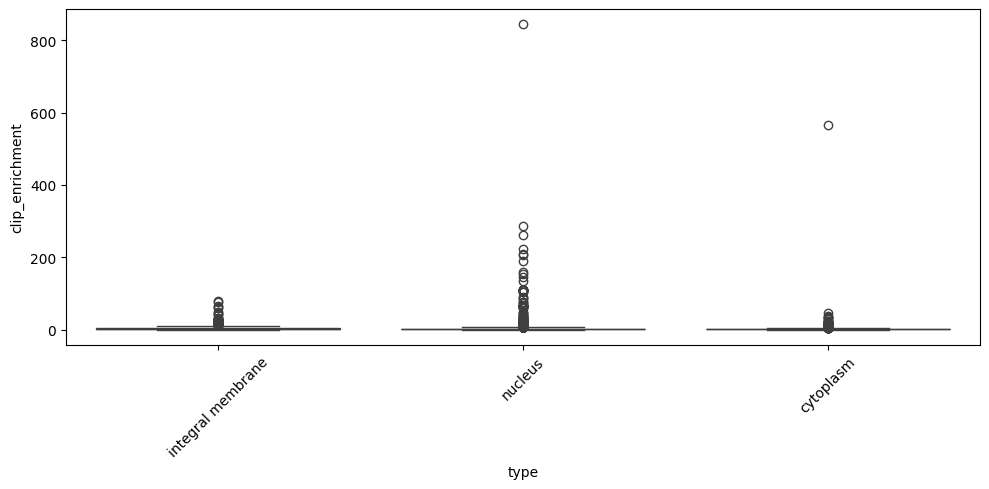

In [24]:
import pandas as pd

# 2. gene_id에서 버전(.1 등) 제거 (mouselocal에도 없으면, 맞춰줘야 함)
cnts.index = cnts.index.str.replace(r'\.\d+$', '', regex=True)
mouselocal['gene_id'] = mouselocal['gene_id'].str.replace(r'\.\d+$', '', regex=True)

# 3. cnts와 mouselocal merge (gene_id 기준)
merged = cnts.merge(mouselocal, left_index=True, right_on='gene_id', how='inner')

# 4. 원하는 값의 분포, category별 통계 확인
# 예: category별 clip_enrichment, rden_change 평균/분포
summary = merged.groupby('type')[['clip_enrichment', 'rden_change']].describe()
print(summary)

# 5. (선택) 카테고리별 vs 나머지 유전자간의 분포 비교(Mann-Whitney U test 등)
from scipy.stats import mannwhitneyu

results = []
for t in merged['type'].unique():
    in_group = merged[merged['type'] == t]['clip_enrichment'].dropna()
    out_group = merged[merged['type'] != t]['clip_enrichment'].dropna()
    stat, pval = mannwhitneyu(in_group, out_group, alternative='two-sided')
    results.append({'type': t, 'U': stat, 'pvalue': pval, 'n_group': len(in_group)})

results_df = pd.DataFrame(results)
results_df['FDR'] = results_df['pvalue'] * len(results_df) / (results_df['pvalue'].rank())  # Benjamini-Hochberg FDR 단순화 예시
print(results_df.sort_values('FDR'))

# 6. (옵션) 카테고리별로 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=merged, x='type', y='clip_enrichment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

summary = []
category_list = merged['type'].dropna().unique()

# 각 카테고리(예: nucleus, cytoplasm 등)에 대해 집계
for cat in category_list:
    in_cat = merged[merged['type'] == cat]['clip_enrichment'].dropna()
    out_cat = merged[merged['type'] != cat]['clip_enrichment'].dropna()
    n_genes = len(in_cat)
    # 평균 log2(enrichment) 차이
    log2diff = np.mean(np.log2(in_cat + 1e-8)) - np.mean(np.log2(out_cat + 1e-8))  # 0 방지용 offset
    # Mann-Whitney U test
    u_stat, pval = mannwhitneyu(in_cat, out_cat, alternative='two-sided')
    summary.append({
        'Category': cat,
        'Number_of_genes': n_genes,
        'Mean_log2_enrichment': np.mean(np.log2(in_cat + 1e-8)),
        'Mean_log2_enrichment_others': np.mean(np.log2(out_cat + 1e-8)),
        'log2_enrichment_diff': log2diff,
        'U_stat': u_stat,
        'p_value': pval
    })

# DataFrame으로 변환
summary_df = pd.DataFrame(summary)

# FDR(Benjamini-Hochberg) 보정
summary_df['FDR'] = multipletests(summary_df['p_value'], method='fdr_bh')[1]

# 표 정렬
summary_df = summary_df.sort_values('FDR')

print(summary_df)

summary_df.to_csv('/content/drive/MyDrive/category_enrichment_summary.csv', index=False)

            Category  Number_of_genes  Mean_log2_enrichment  \
0  integral membrane             2592                   inf   
1            nucleus             4016                   inf   
2          cytoplasm             2040                   inf   

   Mean_log2_enrichment_others  log2_enrichment_diff     U_stat       p_value  \
0                          inf                   NaN  9894474.0  1.774797e-82   
1                          inf                   NaN  8075859.5  3.568492e-26   
2                          inf                   NaN  5919458.5  8.243713e-17   

            FDR  
0  5.324391e-82  
1  5.352738e-26  
2  8.243713e-17  


<ipython-input-26-8b7e4c3ae1ca>:15: RuntimeWarning: invalid value encountered in scalar subtract
  log2diff = np.mean(np.log2(in_cat + 1e-8)) - np.mean(np.log2(out_cat + 1e-8))  # 0 방지용 offset


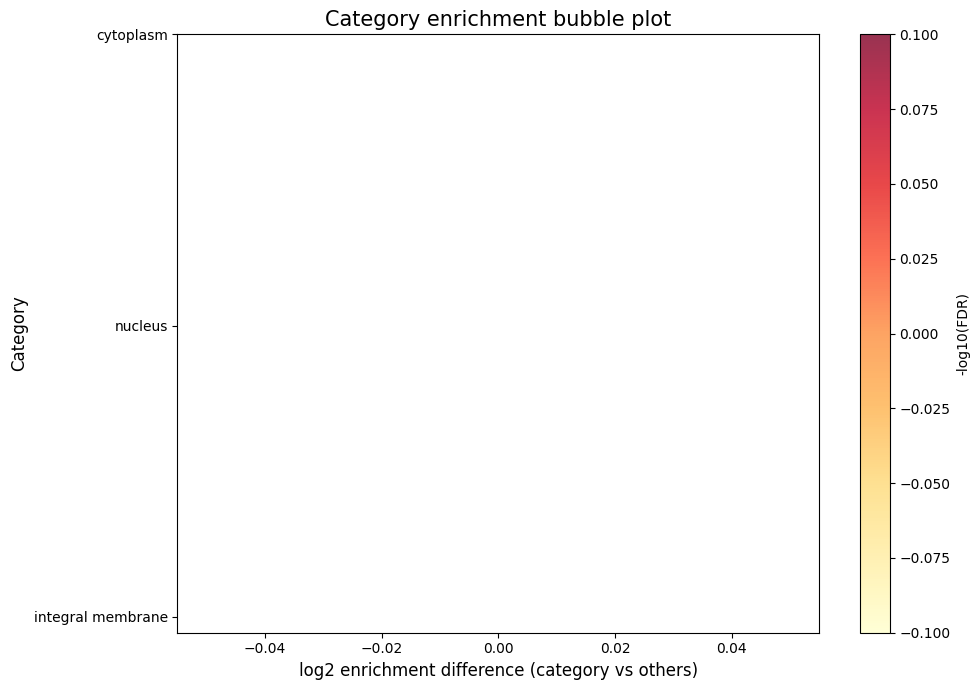

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/category_enrichment_summary.csv')

# 2. FDR, Category에 결측치가 없는 행만 남기기
df = df[df['FDR'].notna() & df['Category'].notna()]

# 3. Category를 문자열로 변환
df['Category'] = df['Category'].astype(str)

# 4. FDR이 0인 값은 아주 작은 값으로 대체 (로그 변환 대비)
df['FDR_plot'] = df['FDR'].replace(0, 1e-300)
df['-log10_FDR'] = -np.log10(df['FDR_plot'])

# 5. FDR이 가장 낮은 20개만 plot
df_plot = df.nsmallest(20, 'FDR').copy()
df_plot = df_plot.reset_index(drop=True)  # index 재설정

# 6. bubble plot
plt.figure(figsize=(10, 7))
sc = plt.scatter(
    df_plot['log2_enrichment_diff'],
    df_plot.index,  # y축: 숫자 인덱스
    s=df_plot['Number_of_genes'] * 5,
    c=df_plot['-log10_FDR'],
    cmap='YlOrRd',
    alpha=0.8,
    edgecolors='k'
)
plt.yticks(df_plot.index, df_plot['Category'])  # 인덱스를 실제 category 이름으로 매핑
plt.xlabel('log2 enrichment difference (category vs others)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Category enrichment bubble plot', fontsize=15)
plt.colorbar(sc, label='-log10(FDR)')
plt.tight_layout()
plt.show()

In [32]:
print(df_plot[['Category', 'log2_enrichment_diff', 'Number_of_genes', '-log10_FDR']])

            Category  log2_enrichment_diff  Number_of_genes  -log10_FDR
0  integral membrane                   NaN             2592   81.273730
1            nucleus                   NaN             4016   25.271424
2          cytoplasm                   NaN             2040   16.083877



Guided Mission 1의 결과를 gene ontology 단위로 다시 분석하고 시각화 합니다.

해당 figure에 사용할 데이터는 Guided mission에서 사용한 CLIP seq 데이터를 사용할 예정입니다.

  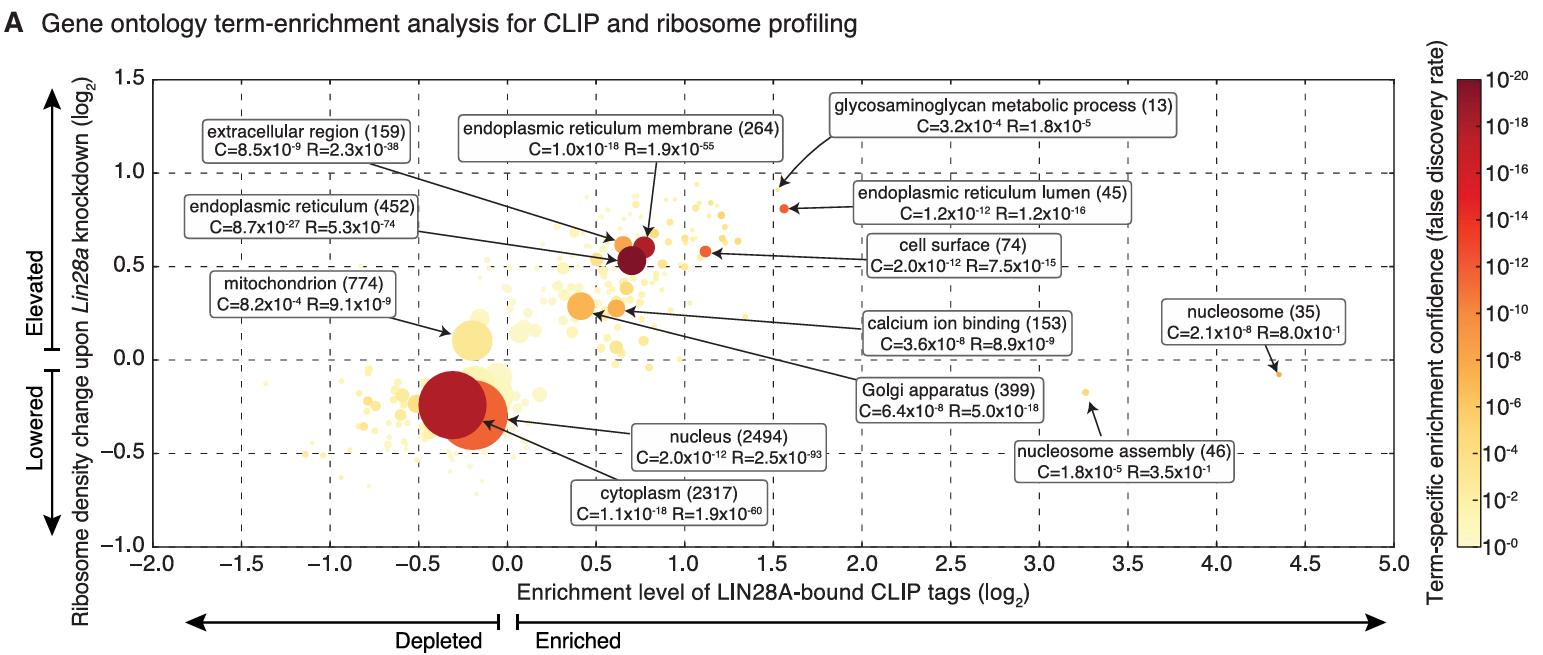

In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


기존 Guided Mission 1의 데이터와 해당 논문의 supplement data를 활용할 예정으로

'Table S6. Gene Ontology Analysis of LIN28A Targets.' 의 데이터를 먼저 읽는다.

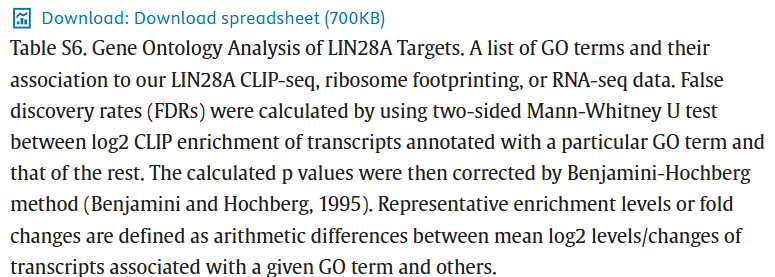

In [4]:
import pandas as pd

# 파일 열기
file_path = 'Sup.S6_Gene_Ontology_Analysis_of_LIN28A_Targets.xls'
df = pd.read_excel(file_path)

# 데이터 확인
print(df.head())

  Table S6. Gene ontology analysis of LIN28A targets\n\nA list of GO terms and their association to our LIN28A CLIP-seq, ribosome footprinting, or RNA-seq data. False discovery rates (FDRs) were calculated using two-sided Mann-Whitney U test between log2 CLIP enrichment of transcripts annotated with a particular GO term and that of the rest. The calculated p-values were then corrected by Benjamini-Hochberg method (Benjamini et al., 1995). Representative enrichment levels or fold changes are defined as arithmetic differences between mean log2 levels/changes of transcripts associated with a given GO term and others.   \
0                                       GO accession                                                                                                                                                                                                                                                                                                                                  

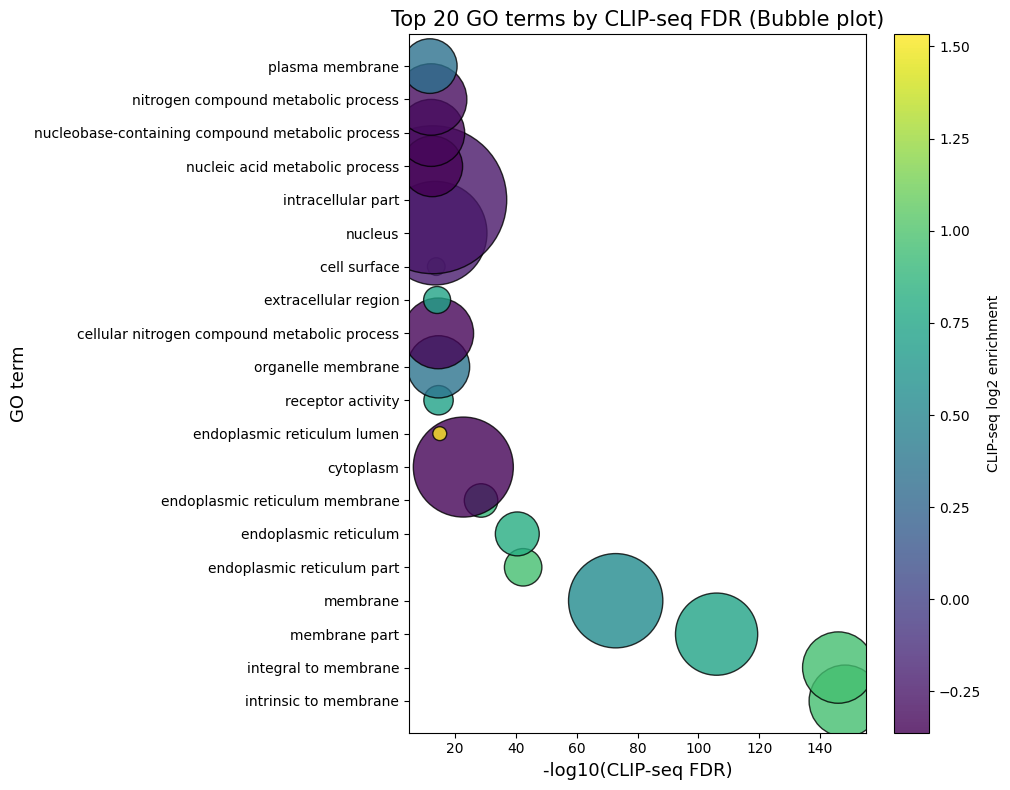

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 파일 불러오기
file_path = 'Sup.S6 Gene Ontology Analysis of LIN28A Targets.csv'
df = pd.read_csv(file_path, skiprows=1)  # 첫 줄 설명은 건너뜀

# 컬럼명 정리
df.columns = [
    "GO accession", "GO term", "CLIP-seq number of valid members", "CLIP-seq FDR",
    "CLIP-seq log2 enrichment", "RPF number of valid members", "RPF FDR",
    "RPF Ribosome density change (log2)", "RNA-seq number of valid members",
    "RNA-seq FDR", "RNA-seq mRNA abundance change (log2)"
]

# GO term 만 필터
df = df[df["GO accession"].str.startswith("GO:")]

# 숫자형으로 변환(에러 시 NaN으로 처리)
df["CLIP-seq FDR"] = pd.to_numeric(df["CLIP-seq FDR"], errors='coerce')
df["CLIP-seq number of valid members"] = pd.to_numeric(df["CLIP-seq number of valid members"], errors='coerce')
df["CLIP-seq log2 enrichment"] = pd.to_numeric(df["CLIP-seq log2 enrichment"], errors='coerce')

# NaN, inf 포함된 행 제거
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["CLIP-seq FDR", "CLIP-seq number of valid members", "CLIP-seq log2 enrichment"])

# FDR이 가장 낮은 20개 GO term 선택
top20 = df.nsmallest(20, "CLIP-seq FDR")

# Bubble plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    -np.log10(top20["CLIP-seq FDR"]),         # x축: -log10(FDR)
    top20["GO term"],                         # y축: GO term
    s=top20["CLIP-seq number of valid members"]*2,   # bubble 크기
    c=top20["CLIP-seq log2 enrichment"],      # bubble 색상
    cmap='viridis', alpha=0.8, edgecolor='k'
)
plt.xlabel("-log10(CLIP-seq FDR)", fontsize=13)
plt.ylabel("GO term", fontsize=13)
plt.title("Top 20 GO terms by CLIP-seq FDR (Bubble plot)", fontsize=15)
plt.colorbar(sc, label='CLIP-seq log2 enrichment')
plt.tight_layout()
plt.show()


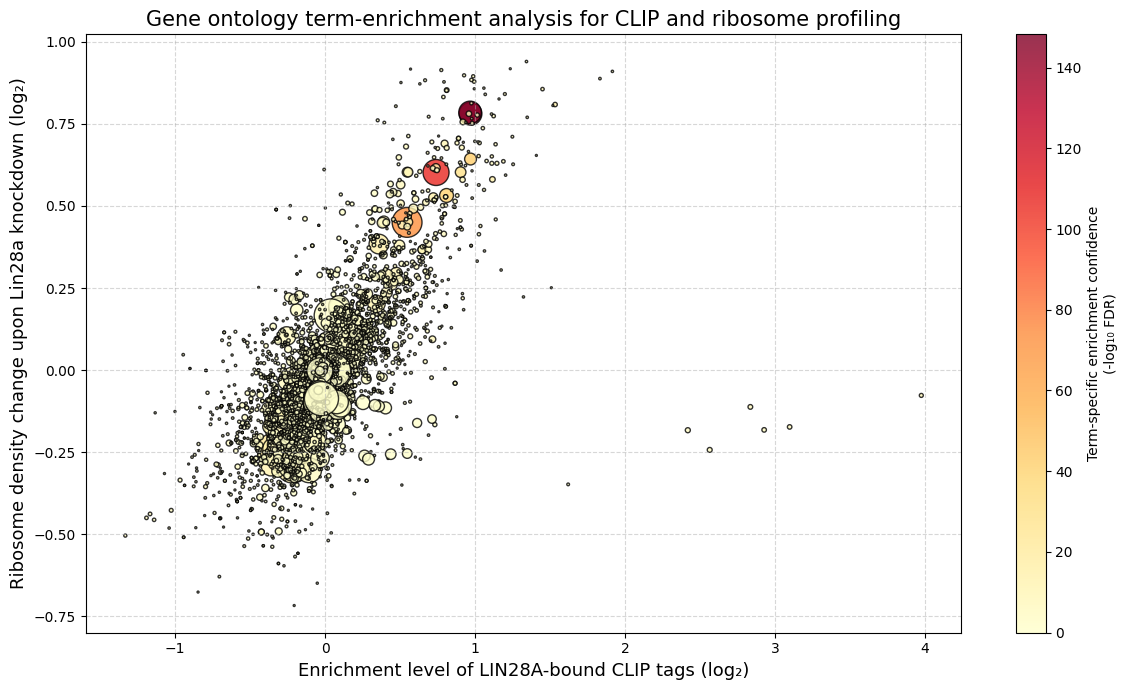

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
file_path = 'Sup.S6 Gene Ontology Analysis of LIN28A Targets.csv'
df = pd.read_csv(file_path, skiprows=1)

# 컬럼명 정리
df.columns = [
    "GO accession", "GO term", "CLIP-seq number of valid members", "CLIP-seq FDR",
    "CLIP-seq log2 enrichment", "RPF number of valid members", "RPF FDR",
    "RPF Ribosome density change (log2)", "RNA-seq number of valid members",
    "RNA-seq FDR", "RNA-seq mRNA abundance change (log2)"
]

# 숫자 변환 및 결측치 처리
df = df[df["GO accession"].str.startswith("GO:")]
df["CLIP-seq log2 enrichment"] = pd.to_numeric(df["CLIP-seq log2 enrichment"], errors='coerce')
df["RPF Ribosome density change (log2)"] = pd.to_numeric(df["RPF Ribosome density change (log2)"], errors='coerce')
df["CLIP-seq number of valid members"] = pd.to_numeric(df["CLIP-seq number of valid members"], errors='coerce')
df["CLIP-seq FDR"] = pd.to_numeric(df["CLIP-seq FDR"], errors='coerce')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=[
    "CLIP-seq log2 enrichment",
    "RPF Ribosome density change (log2)",
    "CLIP-seq number of valid members",
    "CLIP-seq FDR"
])

# bubble color: -log10(CLIP-seq FDR)
df["-log10(CLIP-seq FDR)"] = -np.log10(df["CLIP-seq FDR"])

# bubble plot
plt.figure(figsize=(12, 7))
bubble = plt.scatter(
    df["CLIP-seq log2 enrichment"],
    df["RPF Ribosome density change (log2)"],
    s=df["CLIP-seq number of valid members"]*0.2,  # bubble size scale 조정
    c=df["-log10(CLIP-seq FDR)"],
    cmap='YlOrRd',
    alpha=0.8,
    edgecolors='k'
)

plt.xlabel("Enrichment level of LIN28A-bound CLIP tags (log₂)", fontsize=13)
plt.ylabel("Ribosome density change upon Lin28a knockdown (log₂)", fontsize=13)
plt.title("Gene ontology term-enrichment analysis for CLIP and ribosome profiling", fontsize=15)
cbar = plt.colorbar(bubble, label="Term-specific enrichment confidence\n(-log₁₀ FDR)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()